In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

In [62]:
'''
This script finds a numerical approximation for the solution to
 the following 1D heat equation with Neumann conditions:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = x,
   u'(x=0,t) = 0, u'(x=1,t) = 0,
 using a backward Euler scheme.
''' 
def U_exact2(x,t):
    M = np.size(x)
    u_ex = 0.5*np.ones(M)  
            
    for s in range(1,1000,2):
        npi= s*np.pi
        c_n = -(4.0)/npi/npi                            
        u_ex = u_ex + c_n*np.cos(npi*x)*np.exp(-1*npi*npi*t)
        
    return u_ex

In [63]:
# perform initial set up for number of points in time and space
L=3.0; T=1.0
Initial_Water = 25.0
Initial_Metal = 750.0
Rod_Begin=1
Rod_End=2
Nx_spaces = 30; Nt_gaps = 50; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1
x = np.linspace(0, L, Nx_points)
   # mesh points in space


dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]
print()
C = dt/dx**2
print("dx=",dx, "dt=", dt,"C =",C)
print(t)
# set up structures to hold U and U_ex2 and interim arrays
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)
U = np.zeros((Nx_points,Nt_points))
U_ex2 = np.zeros((Nx_points,Nt_points))


dx= 0.1 dt= 0.02 C = 1.9999999999999996
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [69]:
# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points-1): # rows from 1 to Nx-2
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C
A[0,0] = 1+2*C  ; A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# find the inverse of A and use for all points
Ainv = np.linalg.inv(A)

# function for setting the initial condition in space  I(x)
def I2(x):
    I_x=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i] >Rod_Begin and x[i]< Rod_End:
            I_x[i]= Initial_Metal
        else:
            I_x[i]= Initial_Water
    return I_x

# Set initial condition u(x,0) = I(x)
u_old = I2(x) # no dirichlet boundary conditions in this example
# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
#perform time=stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.dot(Ainv,b)
    # Update u_1 before next step
    u_old = u
    U[:,n] = u

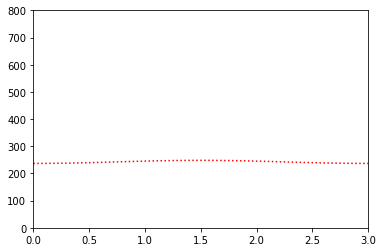

In [70]:
# set up animation plots
fig, ax = plt.subplots()
ax.axis([0,3,0,800])
def animate(i):
    l.set_data(x, U[:,i])
    
ax.axis([0,3,0,800.0])
l, = ax.plot([],[],':r')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani2.to_jshtml())

In [87]:
Curve_Area=np.ones(np.size(t))
for i in range(np.size(t)):
    Curve_Area[i] = np.trapz(U[:,i],x)


[727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5
 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5
 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5
 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5 727.5
 727.5 727.5 727.5]


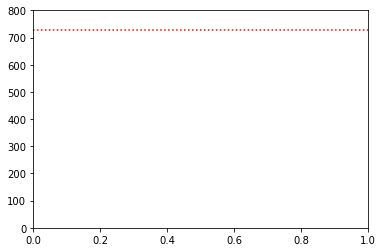

In [91]:

fig, ax = plt.subplots()
ax.axis([0,1,0,800])
    
ax.axis([0,1,0,800.0])
l, = ax.plot(t,Curve_Area,':r')
